# Set up data for degradation

## Import libraries

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Import data

In [16]:
df = pd.read_csv('WineQT.csv')
df = df.drop(columns=["Id"], axis=1)

## Output distribution

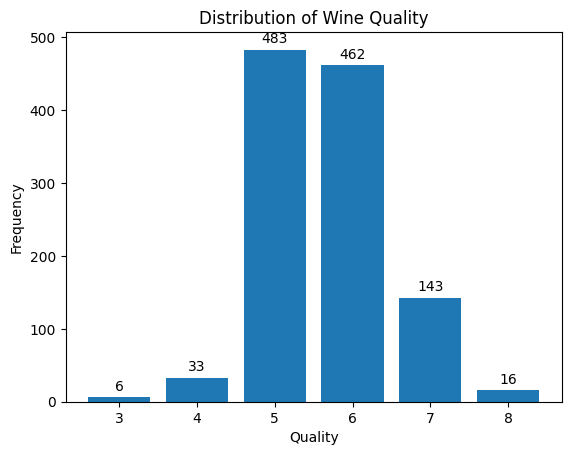

In [17]:
counts = df['quality'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
for i, v in enumerate(counts.values):
    plt.text(counts.index[i], v + 5, str(v), ha='center', va='bottom')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

## Split into classes

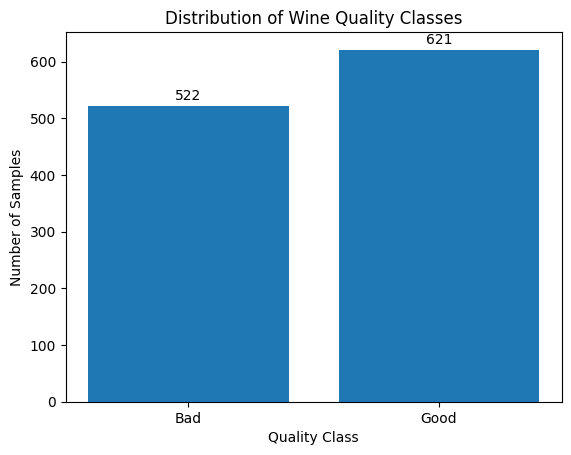

In [18]:
bad_df = df[df['quality'] <= 5]
good_df = df[df['quality'] > 5]

classes_counts = [len(bad_df), len(good_df)]
plt.bar(['Bad', 'Good'], classes_counts)
for i, v in enumerate(classes_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.xlabel('Quality Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Wine Quality Classes')
plt.show()

## Skew datasets

In [19]:
true_bad_df, false_bad_df = train_test_split(bad_df, test_size=0.25, random_state=42)
true_good_df, false_good_df = train_test_split(good_df, test_size=0.25, random_state=42)

bad_df = pd.concat([true_bad_df, false_good_df])
good_df = pd.concat([true_good_df, false_bad_df])

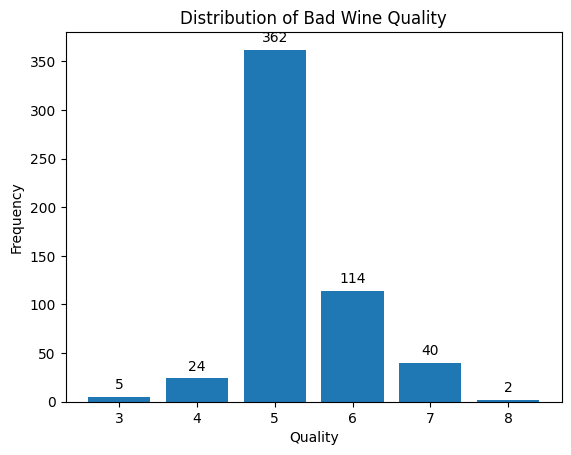

In [20]:
bad_counts = bad_df['quality'].value_counts().sort_index()
plt.bar(bad_counts.index, bad_counts.values)
for i, v in enumerate(bad_counts.values):
    plt.text(bad_counts.index[i], v + 5, str(v), ha='center', va='bottom')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Bad Wine Quality')
plt.show()

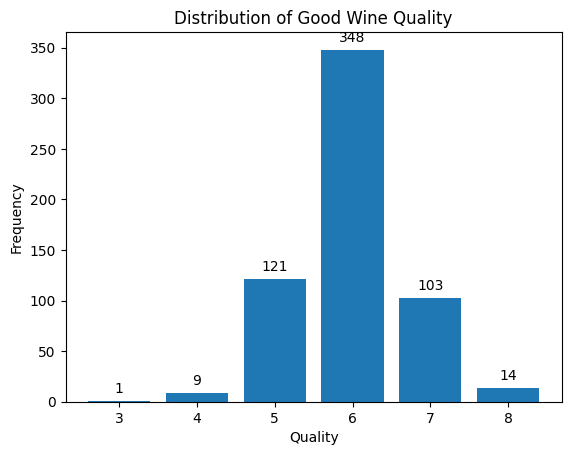

In [21]:
good_counts = good_df['quality'].value_counts().sort_index()
plt.bar(good_counts.index, good_counts.values)
for i, v in enumerate(good_counts.values):
    plt.text(good_counts.index[i], v + 5, str(v), ha='center', va='bottom')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Good Wine Quality')
plt.show()

In [22]:
bad_df.to_csv('bad_wine.csv', index=False)
good_df.to_csv('good_wine.csv', index=False)
df.to_csv('full_wine.csv', index=False)

## Last dataset with artificail samples

In [23]:
# Prepare features and target for SMOTE
X = df.drop(['quality'], axis=1)
y = df['quality']

# Apply SMOTE to the bad wine dataset
smote = SMOTE(random_state=42)
X_resample, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_smote = pd.DataFrame(X_resample, columns=X_resample.columns)
df_smote['quality'] = y_resampled

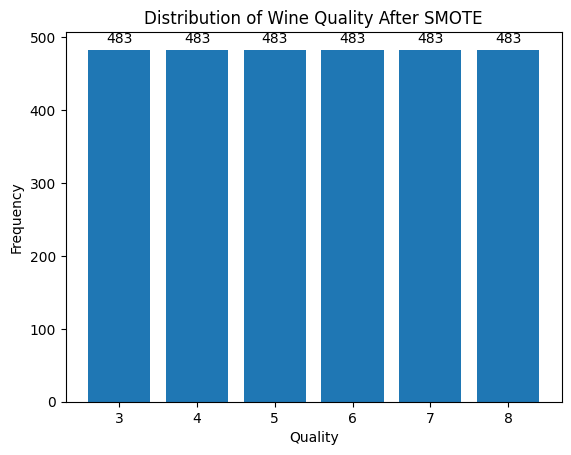

In [24]:
smote_counts = df_smote['quality'].value_counts().sort_index()
plt.bar(smote_counts.index, smote_counts.values)
for i, v in enumerate(smote_counts.values):
    plt.text(smote_counts.index[i], v + 5, str(v), ha='center', va='bottom')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality After SMOTE')
plt.show()

In [25]:
df_smote.to_csv('wine_smote.csv', index=False)

## Data to JSON

In [26]:
file_contents = dict()
instances = []
results = []

X_good = good_df.drop(['quality'], axis=1)
y_good = good_df['quality']
for X, y in zip(X_good.values, y_good.values):
    entry = {name: int(value) for name, value in zip(X_good.columns, X)}
    instances.append(entry)
    results.append(int(y))

file_contents['instances'] = instances
file_contents['results'] = results

with open('good_wine.json', 'w') as f:
    import json
    json.dump(file_contents, f, indent=4)

In [27]:
file_contents = dict()
instances = []
results = []

X_bad = bad_df.drop(['quality'], axis=1)
y_bad = bad_df['quality']
for X, y in zip(X_bad.values, y_bad.values):
    entry = {name: int(value) for name, value in zip(bad_df.columns, X)}
    instances.append(entry)
    results.append(int(y))

file_contents['instances'] = instances
file_contents['results'] = results

with open('bad_wine.json', 'w') as f:
    import json
    json.dump(file_contents, f, indent=4)

In [28]:
file_contents = dict()
instances = []
results = []

X = df.drop(['quality'], axis=1)
y = df['quality']

for X_entry, y_entry in zip(X.values, y.values):
    entry = {name: int(value) for name, value in zip(X.columns, X_entry)}
    instances.append(entry)
    results.append(int(y_entry))

file_contents['instances'] = instances
file_contents['results'] = results

with open('full_wine.json', 'w') as f:
    import json
    json.dump(file_contents, f, indent=4)